In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Desktop/python/related_categories_news.csv")
print(df.head())

                                               title                  date  \
0  'Call of Duty: Black Ops 6' Is First Big Test ...  2024-10-25T17:15:43Z   
1  8BitDo’s first smartphone controller has Hall ...  2024-10-25T17:11:27Z   
2  Call of Duty: Black Ops 6's arachnophobia mode...  2024-10-25T16:16:14Z   
3  The AirPods Pro 2 Finally Receive Its Hearing ...  2024-10-25T15:43:57Z   
4  Here’s everything Apple will likely announce n...  2024-10-25T15:34:00Z   

                                             summary  \
0  The latest game in the series is the first to ...   
1  8BitDo’s new Ultimate Mobile Gaming Controller...   
2  We've seen some unique approaches to arachnoph...   
3  You just need to wait for Monday (iOS 18.1's r...   
4  Apple has confirmed that it has an “exciting w...   

                                                 url    category  
0  https://www.bloomberg.com/news/newsletters/202...  technology  
1  https://www.theverge.com/2024/10/25/24279435/8...  techno

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     100 non-null    object
 1   date      100 non-null    object
 2   summary   94 non-null     object
 3   url       100 non-null    object
 4   category  100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB
None


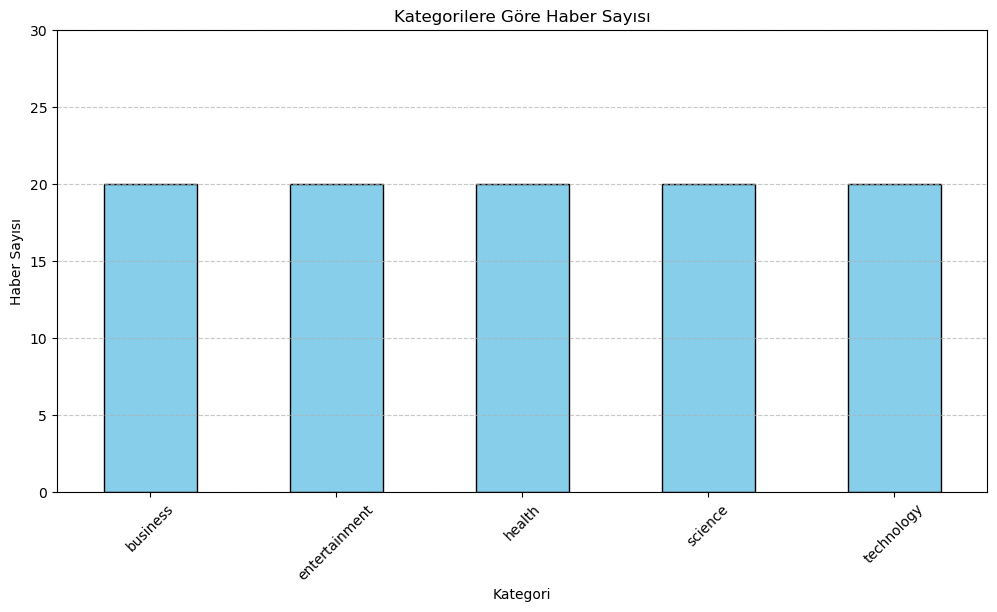

In [3]:
# category_news=df.groupby("category")["date"].value_count()
# category_news.plot()
#yapay zeka yaptı yine yapacağını

import matplotlib.pyplot as plt

# Her kategorideki tarih sayısını alalım
category_news = df.groupby("category")["date"].count()

# Çubuk grafiği
plt.figure(figsize=(12, 6))
category_news.plot(kind="bar", color="skyblue", edgecolor="black")

# Y eksenini daha yüksek yapma
plt.ylim(0, category_news.max() + 10)  # Y ekseninin üst sınırını artır

plt.title("Kategorilere Göre Haber Sayısı")
plt.xlabel("Kategori")
plt.ylabel("Haber Sayısı")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1400x800 with 0 Axes>

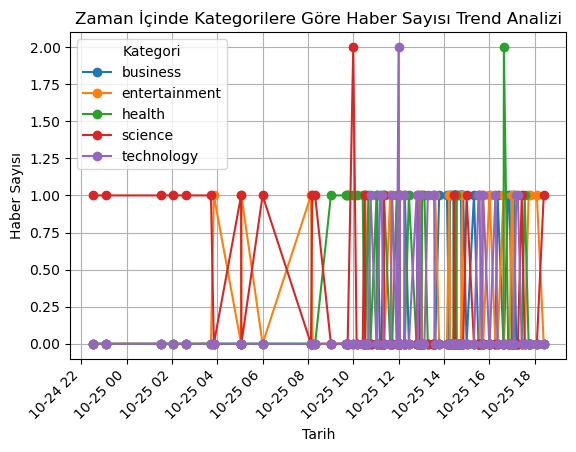

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 'date' sütununu datetime formatına dönüştür
df['date'] = pd.to_datetime(df['date'])

# Tarih ve kategoriye göre gruplama
trend_data = df.groupby(['date', 'category']).size().unstack(fill_value=0)

# Grafiği çiz
plt.figure(figsize=(14, 8))
trend_data.plot(kind='line', marker='o')

# Başlık ve etiketler
plt.title("Zaman İçinde Kategorilere Göre Haber Sayısı Trend Analizi")
plt.xlabel("Tarih")
plt.ylabel("Haber Sayısı")
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Kategori')
plt.show()


category
health        1
technology    1
dtype: int64


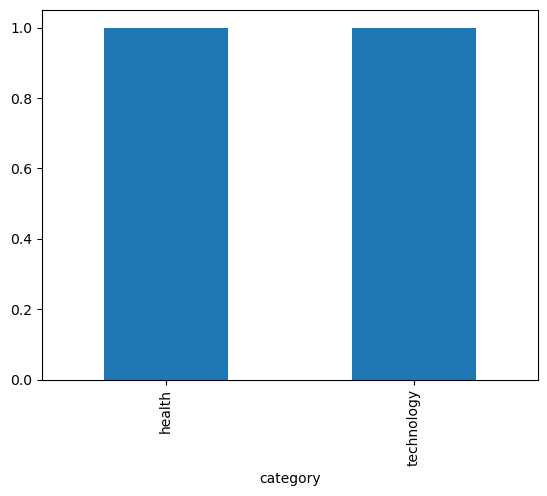

In [5]:
df_clean_summary = df.dropna(subset = ["summary"])
phone_summary = df_clean_summary[df_clean_summary["summary"].str.contains( pat="phone", case=False)]
phone_summary_categorized = phone_summary.groupby("category").size()
print(phone_summary_categorized)
phone_summary_categorized.plot(kind="bar")
# # Mevcut y ekseninin sınırlarını al
# current_ylim = plt.gca().get_ylim()
# # Y ekseninin maksimum değerine 10 ekle
# plt.ylim(current_ylim[0], current_ylim[1] + 1)
plt.show()

category
business         2
entertainment    2
health           4
science          5
technology       6
dtype: int64


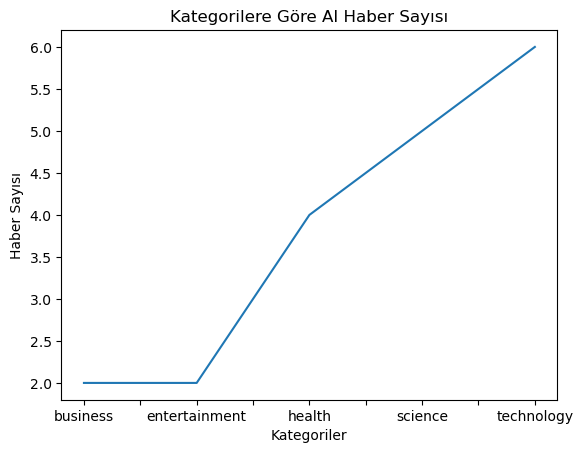

In [6]:
df_ai_clear = df.dropna(subset="title")
df_ai_news = df_ai_clear[df_ai_clear["title"].str.contains(pat="ai", case=False)]
df_ai_news =df_ai_news.groupby("category").size()
print(df_ai_news.head())
df_ai_news.plot()
plt.title("Kategorilere Göre AI Haber Sayısı")
plt.xlabel("Kategoriler")
plt.ylabel("Haber Sayısı")
plt.show()

In [7]:
from textblob import TextBlob
def get_sentiment(text):
    if isinstance(text, str):  # Metin bir string mi kontrol et
        return TextBlob(text).sentiment.polarity  # Polarity: -1 (negatif) ile 1 (pozitif) arasında
    return None  # Eğer metin string değilse, None döndür
# Duygu puanını ekle
df['sentiment'] = df['summary'].apply(get_sentiment)

print(df.head())

                                               title  \
0  'Call of Duty: Black Ops 6' Is First Big Test ...   
1  8BitDo’s first smartphone controller has Hall ...   
2  Call of Duty: Black Ops 6's arachnophobia mode...   
3  The AirPods Pro 2 Finally Receive Its Hearing ...   
4  Here’s everything Apple will likely announce n...   

                       date  \
0 2024-10-25 17:15:43+00:00   
1 2024-10-25 17:11:27+00:00   
2 2024-10-25 16:16:14+00:00   
3 2024-10-25 15:43:57+00:00   
4 2024-10-25 15:34:00+00:00   

                                             summary  \
0  The latest game in the series is the first to ...   
1  8BitDo’s new Ultimate Mobile Gaming Controller...   
2  We've seen some unique approaches to arachnoph...   
3  You just need to wait for Monday (iOS 18.1's r...   
4  Apple has confirmed that it has an “exciting w...   

                                                 url    category  sentiment  
0  https://www.bloomberg.com/news/newsletters/202...  technol

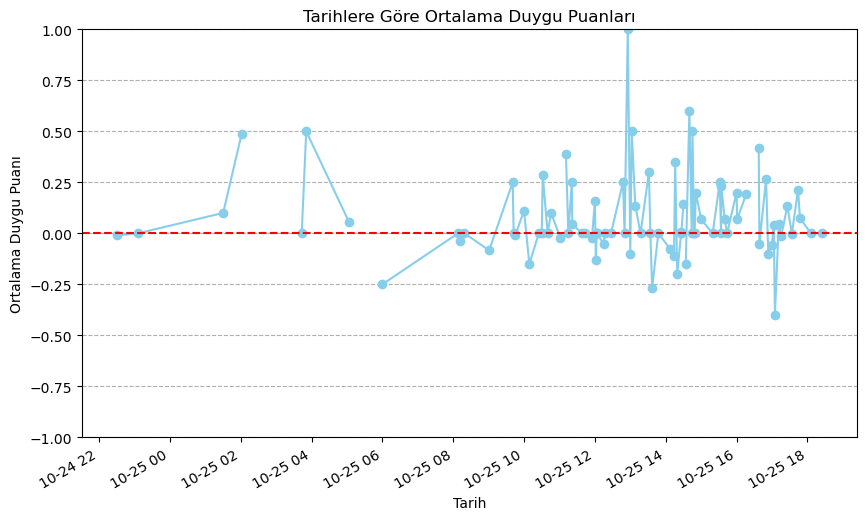

In [8]:
# Tarihlere göre toplam duygu puanlarını hesapla
date_sentiment = df.groupby('date')['sentiment'].mean()

# Grafiği oluştur
plt.figure(figsize=(10, 6))
date_sentiment.plot(kind='line', marker='o', color='skyblue')
plt.title('Tarihlere Göre Ortalama Duygu Puanları')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Duygu Puanı')
plt.ylim(-1, 1)  # Duygu puanlarının aralığı -1 ile 1 arasında
plt.axhline(0, color='red', linestyle='--')  # 0 çizgisi ekle
plt.grid(axis='y', linestyle='--')
plt.show()

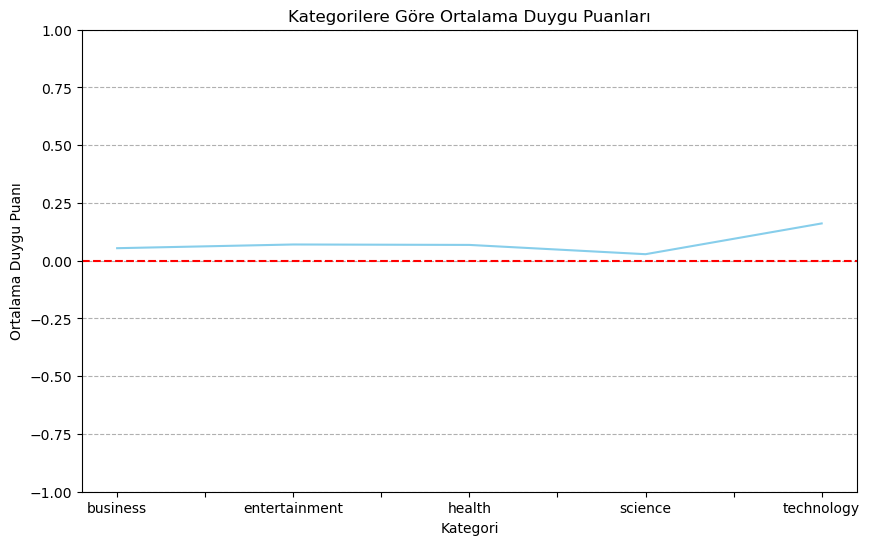

In [9]:

# Kategorilere göre toplam duygu puanlarını hesapla
category_sentiment = df.groupby('category')['sentiment'].mean()

# Grafiği oluştur
plt.figure(figsize=(10, 6))
category_sentiment.plot(kind='line', color='skyblue')
plt.title('Kategorilere Göre Ortalama Duygu Puanları')
plt.xlabel('Kategori')
plt.ylabel('Ortalama Duygu Puanı')
plt.ylim(-1, 1)  # Duygu puanlarının aralığı -1 ile 1 arasında
plt.axhline(0, color='red', linestyle='--')  # 0 çizgisi ekle
plt.grid(axis='y', linestyle='--')
plt.show()

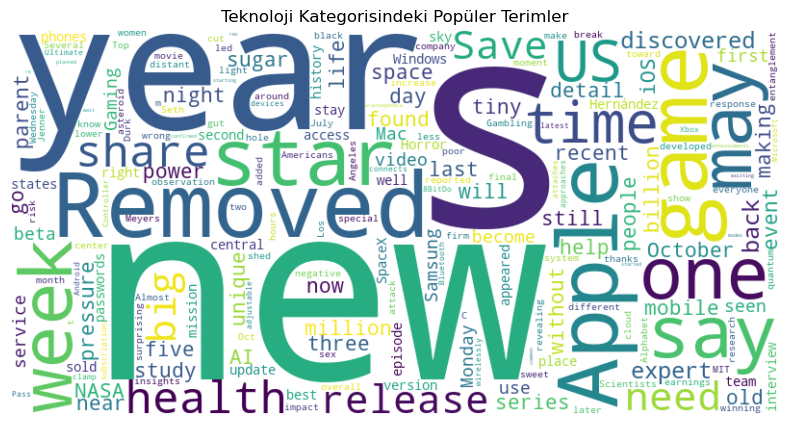

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# özetleri birleştir
text = " ".join(df['summary'].dropna())

# Kelime bulutu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Kelime bulutunu görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Teknoloji Kategorisindeki Popüler Terimler")
plt.show()


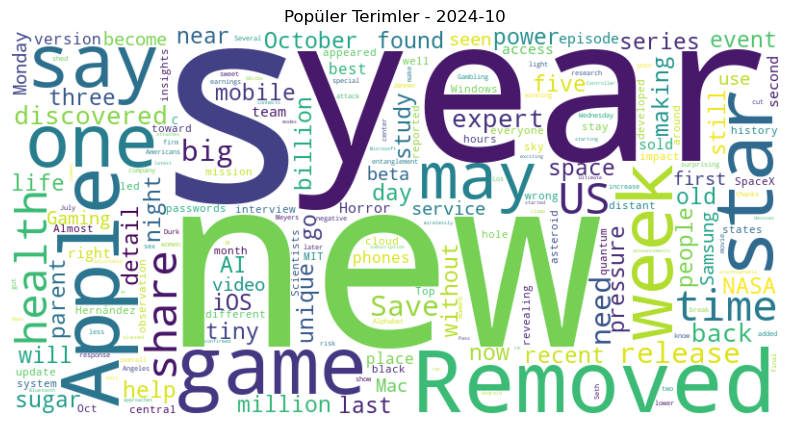

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Örneğin aylık kelime bulutları için veriyi aylık gruplara ayırın
# Zaman dilimini kaldırarak tarih sütununu dönüştürme
df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)
df['month'] = df['date'].dt.to_period('M')


# Her ay için kelime bulutu oluştur ve göster
for month, group in df.groupby('month'):
    text = " ".join(group['summary'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Popüler Terimler - {month}")
    plt.show()


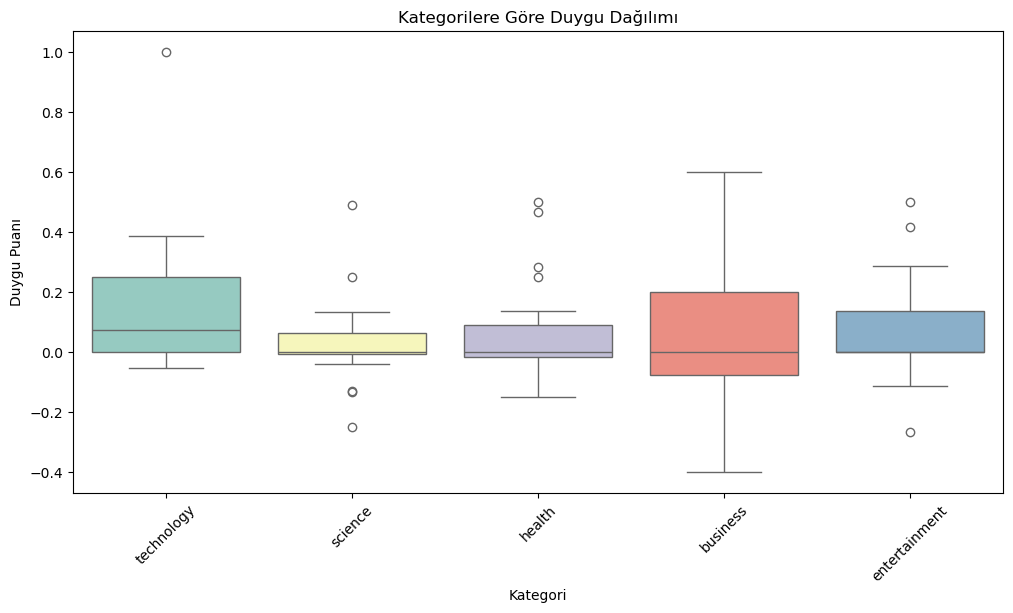

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='sentiment', data=df, hue='category', palette="Set3", dodge=False)
plt.legend([], [], frameon=False)  # Legend'ı kaldırmak için
plt.title("Kategorilere Göre Duygu Dağılımı")
plt.xlabel("Kategori")
plt.ylabel("Duygu Puanı")
plt.xticks(rotation=45)
plt.show()




Etiketleme ve Modelleme (İleri Düzey): Haber başlıklarından veya özetlerinden metin sınıflandırma, kümeleme gibi modeller oluşturabilirsiniz. Özellikle belirli kategorilerde sınıflandırma yapmak veya belirli bir modelin kategorilere göre haberleri otomatik olarak ayırmasını sağlamak, yapay zeka ile ilişkili bir ürün geliştirmek istiyorsanız faydalı olabilir.

Haber başlıkları veya özetleri üzerinden metin sınıflandırma ve kümeleme gibi işlemleri gerçekleştirmek, yapay zeka projelerinde oldukça yaygın ve etkili bir yöntemdir. İşte bu süreçleri gerçekleştirmenize yardımcı olacak bazı adımlar ve öneriler:

1. Veri Hazırlama
Öznitelik Seçimi: Başlıklar veya özetler gibi metin verilerini seçin.
Veri Temizleme: Gereksiz karakterleri, özel sembolleri ve durak kelimeleri (stop words) temizleyin. Ayrıca, küçük harfe dönüştürme, kök alma (stemming) ve lemmatizasyon uygulayabilirsiniz.
2. Öznitelik Çıkarma
Metin Temsili: Metinleri sayısal forma dönüştürmek için CountVectorizer veya TF-IDF Vectorizer kullanabilirsiniz.
Kelime Gömme: Word2Vec, GloVe veya FastText gibi kelime gömme tekniklerini kullanarak kelimelerin anlamlarını daha iyi temsil eden vektörler elde edebilirsiniz.
3. Model Seçimi ve Eğitimi
Sınıflandırma Modelleri:
Naive Bayes: Basit ama etkili bir metin sınıflandırma modeli.
Logistic Regression: İkili sınıflama için yaygın kullanılan bir yöntem.
Destek Vektör Makineleri (SVM): Yüksek boyutlu verilerde iyi performans gösterir.
Derin Öğrenme Modelleri: LSTM, GRU veya BERT gibi modeller ile daha karmaşık sınıflandırmalar yapabilirsiniz.
Kümeleme Modelleri:
K-Means: Veri setini belirli sayıda kümeye ayırır.
DBSCAN: Yoğunluğa dayalı bir kümeleme algoritmasıdır.
Hiyerarşik Kümeleme: Veri noktalarını ağaç yapısına göre gruplayan bir yöntemdir.
4. Model Değerlendirmesi
Karmaşıklık Matrisi (Confusion Matrix): Modelin doğruluğunu ve yanlış sınıflandırmalarını görmek için kullanın.
F1 Skoru, Doğruluk ve Kesinlik: Model performansını değerlendirin.
Kümeleme için: Silhouette Skoru veya Davies-Bouldin Skoru gibi metriklerle kümeleme sonuçlarını değerlendirin.
5. Uygulama
Eğitilen modeli kullanarak yeni haber başlıklarını veya özetlerini otomatik olarak sınıflandırın.
Gelişmiş bir kullanıcı arayüzü ile sonuçları görselleştirin ve kullanıcıların istedikleri bilgiyi daha kolay bulmasını sağlayın.
Örnek Kullanım Durumları
Otomatik Etiketleme: Gelen haber başlıklarını otomatik olarak belirli kategorilere ayırma.
Kategoriler Arası İlişki Analizi: Belirli kategorilerdeki haberlerin nasıl bir araya geldiğini veya hangi kategorilerin daha fazla ilişki gösterdiğini inceleme.
Bu adımlar doğrultusunda metin sınıflandırma veya kümeleme projelerinizi geliştirebilir ve yapay zeka ile ilişkili uygulamalarınızı zenginleştirebilirsiniz. Eğer belirli bir aşamada daha fazla bilgi veya yardım isterseniz, lütfen belirtin!

1. Veri Hazırlama
Öznitelik Seçimi: Başlıklar veya özetler gibi metin verilerini seçin.
Veri Temizleme: Gereksiz karakterleri, özel sembolleri ve durak kelimeleri (stop words) temizleyin. Ayrıca, küçük harfe dönüştürme, kök alma (stemming) ve lemmatizasyon uygulayabilirsiniz., başlayalım
ChatGPT:
ChatGPT
Veri hazırlama aşaması, metin verilerinizin analiz için uygun hale getirilmesi açısından kritik bir adımdır. Aşağıda, metin verilerini hazırlamak için takip edebileceğiniz adımları ve Python’da bu işlemleri gerçekleştirmek için kullanabileceğiniz bazı kütüphaneleri bulabilirsiniz.

1. Öznitelik Seçimi
Metin verilerinden hangilerini kullanacağınıza karar verin. Örneğin, başlıkları veya özetleri seçebilirsiniz.

python
Kodu kopyala
# Örnek: Başlıkları kullanma
texts = df['title']  # veya df['summary'] ile özetleri alabilirsiniz
2. Veri Temizleme
Bu adımda metin verilerinizi temizlemek için aşağıdaki adımları uygulayabilirsiniz:

Gereksiz Karakterleri Temizleme:
Metinlerde bulunan özel karakterleri ve sayıları kaldırabilirsiniz.
python
Kodu kopyala
import re

# Özel karakterleri kaldırma
texts = texts.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
Küçük Harfe Dönüştürme:
Tüm metinleri küçük harfe dönüştürerek tutarlılığı artırabilirsiniz.
python
Kodu kopyala
texts = texts.str.lower()  # Tüm metinleri küçük harfe dönüştürme
Durak Kelimeleri Temizleme:
Analiz için anlamı olmayan durak kelimeleri (stop words) kaldırabilirsiniz. Bunun için nltk veya sklearn kütüphanelerini kullanabilirsiniz.
python
Kodu kopyala
from nltk.corpus import stopwords

# Durak kelimeleri yükleme
stop_words = set(stopwords.words('english'))

# Durak kelimeleri kaldırma
texts = texts.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
Kök Alma (Stemming) veya Lemmatizasyon:
Kelimeleri köklerine indirgeyerek veya kelimeleri kök halinde tekrar düzenleyerek metni sadeleştirebilirsiniz. nltk veya spaCy kütüphanelerini kullanarak bu işlemleri gerçekleştirebilirsiniz.
Kök Alma Örneği:

python
Kodu kopyala
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Kök alma işlemi
texts = texts.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
Lemmatizasyon Örneği:

python
Kodu kopyala
import spacy

nlp = spacy.load('en_core_web_sm')

# Lemmatizasyon işlemi
def lemmatize(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

texts = texts.apply(lemmatize)
Örnek Tam Temizleme Süreci
Aşağıda tüm bu adımları birleştiren örnek bir Python kodu bulunmaktadır:

python
Kodu kopyala
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy

# Veri yükleme
df = pd.read_csv('your_data.csv')  # Kendi veri dosyanızı buraya ekleyin

# Başlıkları seçme
texts = df['title']

# Temizleme işlemleri
# 1. Özel karakterleri temizleme
texts = texts.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
# 2. Küçük harfe dönüştürme
texts = texts.str.lower()
# 3. Durak kelimeleri temizleme
stop_words = set(stopwords.words('english'))
texts = texts.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# 4. Kök alma işlemi
stemmer = PorterStemmer()
texts = texts.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Temizlenmiş metinler
print(texts.head())
Bu adımları izleyerek metin verilerinizi analiz için uygun hale getirebilirsiniz. İlgili kütüphanelerin yüklenmesi ve gerekli dosyaların hazırlanması gibi adımları unutmayın

In [14]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy

# Veri yükleme
 # Kendi veri dosyanızı buraya ekleyin
import nltk
nltk.download('stopwords')

# Başlıkları seçme
texts = df['title']

# Temizleme işlemleri
# 1. Özel karakterleri temizleme
texts = texts.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
# 2. Küçük harfe dönüştürme
texts = texts.str.lower()
# 3. Durak kelimeleri temizleme
stop_words = set(stopwords.words('english'))
texts = texts.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
#Bu örnekte split():
# Cümledeki her kelimeyi ayırarak bir listeye yerleştirir.
# Liste çıktısında her bir öğe bir kelime olarak görünür.
#------kök alma-------
stemmer = PorterStemmer()
texts = texts.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Bu adımda, her kelime kök haline getirilir. Örneğin, "running", "ran" veya "runs" gibi kelimeler, aynı köke indirgenir. Bu işlem PorterStemmer ile yapılır.
# # Temizlenmiş metinler
print(texts.head())

0    call duti black op first big test microsoft bi...
1    bitdo first smartphon control hall effect joys...
2    call duti black op arachnophobia mode arguabl ...
3    airpod pro final receiv hear health featur giz...
4       here everyth appl like announc next week tomac
Name: title, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CASPER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import gensim
from gensim.models import Word2Vec
# Aşağıdaki kod, her başlık veya özet içindeki kelimelerin vektörlerini alıp, bu kelime vektörlerinin ortalamasını hesaplar.
# Bu, her başlık veya özet için bir genel vektör temsili oluşturur ve daha sonra sınıflandırma ya da kümeleme işlemleri için kullanılabilir.
# # Cümleleri kelime listelerine ayırın
sentences = [text.split() for text in texts]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Bir kelimenin vektör değerine ulaşma
# Her bir text içindeki kelimelerin vektör temsilini almak için
import numpy as np

# Metinlerin ortalama vektör temsilini hesaplama fonksiyonu
def get_average_vector(text, model):
    vectors = []
    for word in text.split():
        if word in model.wv:  # Kelime Word2Vec modelinde varsa
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)  # Ortalama vektörü döndür
    else:
        return np.zeros(model.vector_size)  # Eğer kelime yoksa sıfır vektör döndür

# Metinleri vektör haline getirme
df['vector'] = df['title'].apply(lambda x: get_average_vector(x, model))

# Örnek çıktı
print(df[['title', 'vector']].head())


                                               title  \
0  'Call of Duty: Black Ops 6' Is First Big Test ...   
1  8BitDo’s first smartphone controller has Hall ...   
2  Call of Duty: Black Ops 6's arachnophobia mode...   
3  The AirPods Pro 2 Finally Receive Its Hearing ...   
4  Here’s everything Apple will likely announce n...   

                                              vector  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [-0.00031556556, -0.0037250738, 0.0031406598, ...  
2  [0.0008730227, 0.0042015156, 0.00020671426, -0...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0033548716, -0.009255222, -0.0036329753, 0....  



model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

Word2Vec, kelimelerin sayısal vektör temsillerini oluşturmak için kullanılan bir modeldir.
Word2Vec modelini oluştururken bazı parametreler ayarlanır:
sentences: Eğitim verisi. Her bir cümle kelime listeleri şeklindedir.
vector_size=100: Oluşturulacak kelime vektörlerinin boyutu. Her kelime için 100 boyutlu bir vektör oluşturulacak.
window=5: Kelime bağlamı (context) penceresi. Her kelimenin çevresindeki kaç kelimenin dikkate alınacağını belirtir. Burada 5, bir kelimenin önündeki ve arkasındaki 5 kelimenin dikkate alınacağını gösterir.
min_count=1: Modelin dikkate alacağı en az kelime sıklığı. Bu parametre, metinde en az 1 kez geçen kelimeleri kullanır.
workers=4: Modelin eğitimi sırasında kullanılacak iş parçacığı sayısı. Çok çekirdekli işlemcilerde modelin daha hızlı eğitilmesi için kullanılır.
Bu ifade, kelimelerin anlamını matematiksel olarak temsil eden vektörler oluşturmayı amaçlar, bu da metinlerdeki anlamı ve ilişkileri analiz etmek için faydalıdır.

Sonuç olarak, bu ifade ile Word2Vec modeli, verilen kelime listeleri ile eğitilir ve kelimeleri matematiksel bir uzayda temsil eden vektörler oluşturur. Bu vektörler, kelimeler arasındaki anlam ilişkilerini incelemek ve çeşitli doğal dil işleme görevlerinde kullanılmak üzere yararlıdır.

def get_average_vector(text, model):
    vectors = []
    for word in text.split():
        if word in model.wv:  # 1----
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)  # Ortalama vektörü döndür
    else:
        return np.zeros(model.vector_size)  # Eğer kelime yoksa sıfır vektör döndür

# Metinleri vektör haline getirme
df['vector'] = df['title'].apply(lambda x: get_average_vector(x, model))
1) burada aynı metinlerle eğittiğimiz modelin içinde var ise o kelimeyi vectörs listesine ekliyoruz
) model.wv Nesnesi: Word2Vec modelinin wv (word vectors) kısmı, tüm kelime vektörlerini içerir. Bu kısım, kelimeleri anahtar, vektörleri ise değer olarak depolar. Yani, eğitilmiş her bir kelime için model.wv içinde bir giriş vardır.
yani model.mv nin içinde  {kelime :vectörleri} şeklinde kelime ve vektörlerini saklar

 <!--                öyle güzel uyuyordun ki vurmya kıyamadım                              -->

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
#CountVectorizer veya TF-IDF ile metin verisini dönüştürerek, 
#sınıflandırma için kullanabileceğimiz bir veri oluşturuyoruz.
# TF-IDF vektörleri oluştur
tfidf = TfidfVectorizer(max_features=300)
X = tfidf.fit_transform(df['title']).toarray()
y = df['category']  # Hedef kategorileriniz
# TfidfVectorizer, metinlerdeki kelimeleri TF-IDF (Term Frequency-Inverse Document Frequency)
#yöntemiyle vektörleştirir. Bu yöntem, her kelimenin önemini belirlemek için sıkça kullanılan bir tekniktir.
# max_features=300, yalnızca en sık geçen 300 kelimenin dikkate alınacağını belirtir.
# X değişkeni, her bir başlığı (title) TF-IDF vektörleriyle temsil eden bir matristir. y, 
# başlıkların sınıflandırılacağı hedef kategorilerdir (category sütunu).

# # Eğitim ve test seti oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#######################################
# Bu fonksiyon, X ve y veri setlerini, test_size=0.2 parametresi ile %80 eğitim ve %20 test olarak böler.
# Parametreler şu şekilde aktarılır:
# Model Eğitimi: X_train ve y_train verileri, modelin öğrenmesi için kullanılır. X_train,
# örneklerin özelliklerini (veri noktalarını), y_train ise bu örneklere ait doğru etiketleri
# (sınıfları veya değerleri) içerir. Model, X_train üzerindeki örneklerden y_train etiketlerini 
# doğru tahmin edebilmek için bir ilişki kurmayı öğrenir.

# Model Testi: Eğitim tamamlandıktan sonra, model hiç görmediği X_test verisi üzerinde test edilir.
#    Bu test sırasında model, X_test içindeki örneklere göre tahminler yapar. Tahminler daha sonra, doğru etiketleri içeren y_test ile karşılaştırılır.

# Bu sürecin amacı, modelin öğrendiği bilgileri yeni ve görülmemiş veri üzerinde ne kadar doğru tahmin edebildiğini,
#yani genelleme yeteneğini değerlendirmektir.
#######################################
# Modeli eğit
model = LogisticRegression()
model.fit(X_train, y_train)
#######################################
# Özetle, bu iki satır, lojistik regresyon modelini başlatıp eğitim verisiyle eğitmek için kullanılır. 
# Eğitim tamamlandıktan sonra model,test veya yeni veriler üzerinde tahmin yapmaya hazır hale gelir.
# Model Parametrelerini Öğrenme: fit fonksiyonu, modelin, eğitim veri seti içindeki örneklerden yola çıkarak ilgili parametreleri (örneğin, 
# lojistik regresyon için ağırlıkları) optimize etmesini sağlar. Bu parametreler, modelin doğru tahminler yapabilmesi için en iyi değerlere ayarlanır.

# Veriyi Anlama: fit, modelin özellikler (X_train) ve hedef etiketler (y_train) arasındaki ilişkiyi öğrenmesini sağlar. Model, bu ilişkiyi
#     öğrendikten sonra yeni verilerde sınıflandırma veya tahmin yapmaya hazır hale gelir.

# Temel İşlem: fit fonksiyonu olmadan, model sadece tanımlanmış olur, ancak veri üzerinde herhangi bir öğrenme veya işlem yapılmaz. Bu nedenle, 
#     fit çağrılmadan, model veriye dair hiçbir bilgiye sahip olmadığı için tahmin yapamaz.
#######################################
# Tahminleri yap ve değerlendirme yap
y_pred = model.predict(X_test)
#######################################
# Tahmin Aşaması: predict fonksiyonu, modelin X_test verisindeki her bir örnek için tahmin
#edilen etiketleri döndürmesini sağlar. Eğitim sürecinde model,
# fit fonksiyonu sayesinde X_train ve y_train verileri üzerinden örüntüleri öğrenmiştir.
#predict fonksiyonuyla, test verilerinde aynı örüntülere göre hangi
# sınıfa ait olduklarını tahmin eder.

# Sonuçları Yüksek Performansla Tahmin Etme: Model, X_test verisinde yer alan özelliklere 
#bakarak, bu verilerin hangi kategoriye (örneğin y_test) ait olabileceğine
# dair en iyi tahminini yapar. Bu işlem sonucunda tahmin edilen etiketler, y_pred adlı
#bir değişkene atanır.

# Performansı Ölçme İmkanı: Bu tahmin sonuçları (y_pred), gerçek etiketlerle (y_test) 
#karşılaştırılarak, modelin doğruluğu, hataları ve genel performansı değerlendirilir.
# Örneğin, y_pred ve y_test arasındaki benzerlik modelin doğruluğunu gösterir.

# Özetle, model.predict(X_test), modelin test verilerine dayalı tahmin sonuçlarını üretir 
#ve performans analizi için önemli bir adım sağlar.
#######################################
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# modelin tahmin performansını değerlendirmek için kullanılır.
# Her iki satır da farklı metriklerle modelin doğruluğunu analiz eder:

# Doğruluk (Accuracy):

# python
# Kodu kopyala
# print("Accuracy:", accuracy_score(y_test, y_pred))
# Bu satır, modelin doğruluğunu hesaplar. accuracy_score(y_test, y_pred), 
# modelin X_test verisinde yaptığı tahminlerin doğruluk oranını döndürür. Doğruluk oranı,
# doğru tahmin sayısının toplam tahmin sayısına oranıdır. Bu, modelin test verilerinde
# ne kadar başarılı olduğunu genel bir ölçüyle gösterir.

# Sınıflandırma Raporu (Classification Report):

# python
# Kodu kopyala
# print(classification_report(y_test, y_pred))
# Bu satır, daha detaylı performans ölçütlerini gösterir. classification_report(y_test, y_pred),
# her sınıf için aşağıdaki metrikleri içeren bir rapor üretir:

# Precision (Kesinlik): Modelin tahmin ettiği pozitif sınıfların gerçekten pozitif olma oranıdır.
# Recall (Duyarlılık): Gerçekte pozitif olan örneklerin ne kadarının doğru tahmin edildiğini gösterir.
# F1 Score: Kesinlik ve duyarlılığın harmonik ortalamasıdır; modelin genel doğruluğunu gösterir.
# Destek (Support): Her sınıfın test verisindeki örnek sayısını belirtir.
# Bu değerlendirme metrikleri, modelin test verisindeki başarısını çok boyutlu olarak analiz
# etmenize yardımcı olur ve varsa hangi sınıflarda geliştirmeler yapılabileceğini ortaya çıkarır.

Accuracy: 0.6
               precision    recall  f1-score   support

     business       1.00      0.25      0.40         4
entertainment       0.20      0.33      0.25         3
       health       0.50      0.33      0.40         3
      science       1.00      0.80      0.89         5
   technology       0.62      1.00      0.77         5

     accuracy                           0.60        20
    macro avg       0.67      0.54      0.54        20
 weighted avg       0.71      0.60      0.59        20



In [18]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
# Eğitim aşamasında elde edilen sonuçları daha detaylı analiz etmek için karmaşıklık matrisi,
#F1 skoru ve diğer metrikleri inceleyebiliriz.
# Karmaşıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# conf_matrix = confusion_matrix(y_test, y_pred)
# confusion_matrix(y_test, y_pred) ifadesi, modelin tahmin ettiği sınıflarla gerçek sınıfları
# karşılaştırır ve bir matris döndürür. Bu matris, her bir sınıfın doğru veya yanlış olarak kaç
# kez tahmin edildiğini gösterir.
#################################3
# F1 Skoru
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1 Score:", f1)
#f1 skoru, özellikle dengesiz veri kümelerinde önemlidir. Örneğin, bir sınıfta çok fazla veri,
#diğerinde az veri olduğunda doğruluğu tek başına değerlendirmek yanıltıcı olabilir. F1 skoru, 
#bu dengesiz durumlarda dahi model performansını daha gerçekçi bir şekilde ifade eder.

# F1 Skorunun Formülü
# F1 skoru, doğruluk (precision) ve duyarlılık (recall) kullanılarak aşağıdaki formülle hesaplanır:

# Bu skor, doğruluk ve duyarlılık arasındaki ortalama gibi düşünülebilir, ancak harmonik ortalama
# alarak özellikle düşük değerlere sahip olan bir ölçüte daha fazla önem verir. Bu sayede, modelin
# her iki ölçütte de iyi bir performansa sahip olması sağlanır.
#F1=2× (precision×recall)/(precision+recall)

# F1 Skorunun Değerlendirilmesi
# 1'e yakın bir F1 skoru, modelin hem doğruluk hem de duyarlılık açısından güçlü olduğunu gösterir.
# 0'a yakın bir F1 skoru ise modelin zayıf performans gösterdiğini, ya doğru tahmin yapamadığını
# ya da sınıfları yeterince iyi yakalayamadığını gösterir.
# Precision ve Recall
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
print("Precision:", precision)
print("Recall:", recall)
# Eğer veri setinde bazı sınıflar diğerlerinden çok daha fazla sayıda ise, weighted ortalama 
# her sınıfın toplam sayısına göre metriği ağırlıklandırır. Bu sayede, büyük sınıfların etkisi 
# daha fazla olur ve genel başarı değerlendirmesi sınıf dengesizliklerinden etkilenmez.

Confusion Matrix:
 [[1 1 1 0 1]
 [0 1 0 0 2]
 [0 2 1 0 0]
 [0 1 0 4 0]
 [0 0 0 0 5]]
F1 Score: 0.5920299145299146
Precision: 0.7112499999999999
Recall: 0.6


Doğruluk (Precision)
Doğruluk, modelin doğru pozitif tahminlerinin, tüm pozitif tahminlere oranını gösterir. Yani, model "pozitif" tahmini yaptığında, bu tahminin ne kadarının doğru olduğunu ölçer.

Precision =  True Positives (TP) /(True Positives (TP)+False Positives (FP))


 
Örneğin: Bir spam filtresi doğru bir şekilde spam olarak etiketlediği e-postaların, tüm spam olarak etiketlenenler içindeki oranı doğruluktur. Yüksek doğruluk, modelin spam diye etiketlediği e-postaların çoğunun gerçekten spam olduğunu gösterir.

Duyarlılık (Recall)
Duyarlılık, modelin doğru pozitifleri, yani tüm gerçek pozitif örnekleri ne kadar yakaladığını ölçer. Gerçek pozitifleri yakalama oranı anlamına gelir.

Recall=  True Positives (TP)/ [True Positives (TP)+False Negatives (FN)]
 
Örneğin: Aynı spam filtre örneğini düşünürsek, duyarlılık tüm gerçek spam e-postaların ne kadarının doğru bir şekilde spam olarak etiketlendiğini ifade eder. Yüksek duyarlılık, tüm spam e-postaların büyük kısmının model tarafından "spam" olarak işaretlendiğini gösterir.

Doğruluk ve Duyarlılık Arasındaki Fark
Doğruluk, pozitif tahminlerin doğru olup olmadığını vurgular (yanlış pozitifleri dikkate alır).
Duyarlılık, pozitif örnekleri ne kadar yakaladığını vurgular (yanlış negatifleri dikkate alır).
Kullanım Alanlarına Göre Farklılıkları
Yüksek Doğruluk önemlidir: Yanlış pozitif sonuçların maliyeti yüksek olduğunda. Örneğin, bir kredi onay sürecinde yanlışlıkla "onaylandı" denilen her başvuru maliyetli olabilir.
Yüksek Duyarlılık önemlidir: Pozitif sınıfların kaçırılması maliyetli olduğunda. Örneğin, kanser taraması yapan bir modelde yanlış negatiflerin fazla olması, ciddi sonuçlar doğurabilir.

1. True Positive (TP) - Doğru Pozitif
Modelin, pozitif sınıfa ait bir örneği doğru bir şekilde pozitif olarak sınıflandırdığı durumlardır.

Örneğin: Kanser teşhisinde, gerçekten kanser olan bir hastanın kanser olarak tespit edilmesi doğru pozitif (TP) olur.

2. False Positive (FP) - Yanlış Pozitif
Modelin, negatif sınıfa ait bir örneği yanlış bir şekilde pozitif olarak sınıflandırdığı durumlardır. Yanlış pozitif durumları, genellikle "tip I hata" olarak da adlandırılır.

Örneğin: Kanser teşhisinde, aslında kanser olmayan bir hastanın kanser olarak tespit edilmesi yanlış pozitif (FP) olur.

3. False Negative (FN) - Yanlış Negatif
Modelin, pozitif sınıfa ait bir örneği yanlış bir şekilde negatif olarak sınıflandırdığı durumlardır. Yanlış negatif durumları, "tip II hata" olarak da bilinir.

Örneğin: Kanser teşhisinde, aslında kanser olan bir hastanın kanser değil olarak tespit edilmesi yanlış negatif (FN) olur.

4. True Negative (TN) - Doğru Negatif
Modelin, negatif sınıfa ait bir örneği doğru bir şekilde negatif olarak sınıflandırdığı durumlardır.

Örneğin: Kanser teşhisinde, gerçekten kanser olmayan bir hastanın kanser değil olarak tespit edilmesi doğru negatif (TN) olur.
	                Gerçek Pozitif (1)	Gerçek Negatif (0)
Tahmin Pozitif (1)	True Positive (TP)	False Positive (FP)
Tahmin Negatif (0)	False Negative (FN)	True Negative (TN)
stünlar gerçek değerlerdir satırlar tahmin sonuçları gibi bir şey dir

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


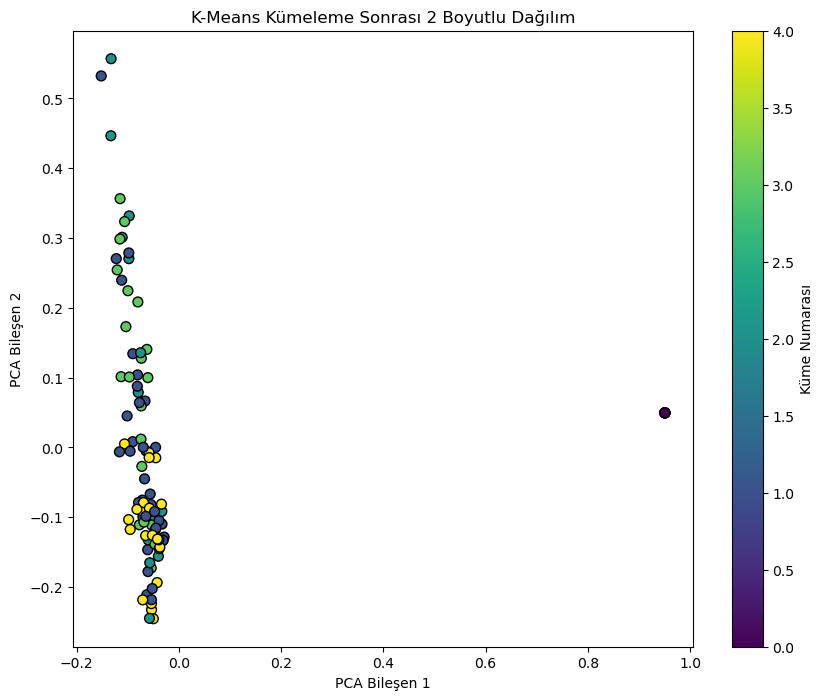

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Boyut İndirgeme (PCA veya TSNE)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)  # veya TSNE kullanabilirsiniz: TSNE(n_components=2).fit_transform(X)

# 2. K-Means ile Kümeleme
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# 3. Küme Görselleştirme
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel("PCA Bileşen 1")
plt.ylabel("PCA Bileşen 2")
plt.title("K-Means Kümeleme Sonrası 2 Boyutlu Dağılım")
plt.colorbar(label='Küme Numarası')
plt.show()


Merkezi Dağılım ve Uç Noktalar:

Dağılımda görülen merkez, genellikle küme merkezlerinin yakın olduğu bölgedir. Kümeler bu merkez etrafında gruplandığında, K-Means algoritması kümeleri merkezden uzaklaşarak genişletmeye çalışır.
Örneğin, 0 küme numarasına sahip noktanın (1,0; 0,1) gibi bir konumda yalnız başına durması, muhtemelen bir uç değer olduğunu ve diğer küme merkezlerinden daha uzak kaldığını gösteriyor. Bu tür tekil noktalar modelin homojen olmayan dağılımlarıyla alakalıdır ve uç değer olarak kabul edilebilir.
Kümelerin Farklı Renklere Göre Dağılımı:

Her küme farklı bir renkle temsil edilmiştir, bu da kümeler arasındaki görsel ayrımı kolaylaştırır.
Sarı renkli kümeler, görselin alt kısımlarında homojen bir dağılım gösteriyor. Bu kümeler muhtemelen belirli bir temayı veya yapıyı temsil eden verileri içeriyor ve diğer kümelere göre daha yoğun bir şekilde ayrışmış durumda.
Mavi tonlarındaki kümeler, sütun yapısının belirgin şekilde ortalarında ve daha yukarıda yoğunlaşarak daha dar bir aralıkta dağılmış durumda. Bu kümelerin merkezleri birbirine yakın olabilir, dolayısıyla temasal olarak birbirine benzer özellikler taşıyan veri noktalarını temsil ediyor olabilirler.
Sütun ve Dağılım Deseni:

Genel olarak, kümelerin -0,2 ile 0,5 aralığında bir sütun oluşturduğu yapıyı gözlemlemişsiniz. Bu, verinin büyük bir kısmının belirli özelliklere göre yakın olduğunu ve bu dağılımın dengesiz olmadığını gösteriyor.
Bu yapının anlamı, muhtemelen analiz edilen başlıkların veya metinlerin belirli temalar ya da konular etrafında toplanmış olmasıdır. Örneğin, belirli bir konuyu temsil eden kelime grupları aynı kümede yer alabilir ve metin içeriğinde benzerlik gösteriyor olabilir.
Kümelerin Homojenliği ve Yoğunlukları:

2,5 küme numarasına sahip olan kümelerin homojen şekilde dağıldığını söylemişsiniz. Bu, K-Means’in belirli bir alanda yoğunlaşan veriyi belirli merkezler etrafında gruplandırdığını ve homojen bir dağılım sağladığını gösteriyor.
Diğer kümeler ise belirgin olarak yoğunlaşmakta ve sadece alt kısımda dağılım göstermektedir. Bu kümelerin sıkı bir yoğunluk göstermesi, benzer veri örneklerinden oluştuğunu ve belirli konularda birbirine yakın olan başlıkları içerdiğini gösterebilir.
Bu analize göre, elde ettiğiniz kümeler belirli içerik veya başlık gruplarının temasal olarak yoğunlaştığını ve K-Means algoritmasının bu grupları anlamlı biçimde ayrıştırabildiğini gösteriyor. Proje açısından, bu kümeleri daha yakından inceleyerek belirli başlık veya konu grupları için daha ayrıntılı çıkarımlar yapabilir, hatta bu kümeleri kullanarak her grubun temsil ettiği konuyu belirlemeye çalışabilirsiniz.

In [23]:
import numpy as np
from collections import Counter

def analyze_clusters(texts, clusters, n_clusters):
    cluster_keywords = {}
    for cluster in range(n_clusters):
        cluster_texts = [texts[i] for i in range(len(texts)) if clusters[i] == cluster]
        words = ' '.join(cluster_texts).split()
        most_common = Counter(words).most_common(10)  # En sık 10 kelime
        cluster_keywords[cluster] = most_common
    return cluster_keywords

# Küme anahtar kelimelerini al
keywords = analyze_clusters(df['title'].tolist(), clusters, 5)
for cluster, words in keywords.items():
    print(f"Küme {cluster}: {words}")


Küme 0: [('[Removed]', 7)]
Küme 1: [('-', 39), ('of', 15), ('The', 10), ('for', 9), ('and', 9), ('to', 8), ('in', 7), ('is', 6), ('a', 6), ('it', 5)]
Küme 2: [('-', 16), ('on', 6), ('The', 5), ('the', 5), ('with', 4), ('and', 3), ('Verge', 3), ('Apple', 3), ('of', 3), ('a', 3)]
Küme 3: [('-', 21), ('to', 13), ('the', 11), ('The', 8), ('of', 8), ('for', 4), ('CNN', 4), ('at', 3), ('after', 3), ('Was', 3)]
Küme 4: [('-', 20), ('in', 9), ('New', 7), ('and', 5), ('after', 4), ('at', 4), ('a', 3), ('to', 3), ('York', 3), ('Gaming', 2)]


def analyze_clusters(texts, clusters, n_clusters):
    cluster_keywords = {}
Fonksiyonun Parametreleri:
texts: Kümeleme işlemine tabi tutulan metinlerin (örneğin, başlıkların) bir listesi.
clusters: Her metnin hangi kümeye ait olduğunu belirten bir dizi (küme etiketleri).
n_clusters: Oluşturulan toplam küme sayısı.
cluster_keywords: Her bir kümenin anahtar kelimelerini saklamak için bir sözlük oluşturulur.


    for cluster in range(n_clusters):
Bu döngü, her bir küme için işlem yapar.


        cluster_texts = [texts[i] for i in range(len(texts)) if clusters[i] == cluster]
Küme Metinlerini Seçme:
cluster_texts, mevcut cluster numarasına ait olan metinleri toplar.
texts listesinden, küme etiketine göre uygun metinleri filtreler.


        words = ' '.join(cluster_texts).split()
Kelime Listesi Oluşturma:
cluster_texts listesindeki metinleri birleştirir (join) ve daha sonra boşluk karakterine göre böler (split). Böylece, o kümedeki tüm kelimelerin bir listesi elde edilir.
python
Kodu kopyala
        most_common = Counter(words).most_common(10)  # En sık 10 kelime
En Sık Kelimeleri Bulma:
Counter sınıfı, kelimelerin sıklığını sayar ve most_common(10) ile en sık geçen 10 kelimeyi ve bunların sayısını döner.

        cluster_keywords[cluster] = most_common
Sonuçları Saklama:
cluster_keywords sözlüğünde, mevcut küme için en sık kelimeleri kaydeder.
python
Kodu kopyala
    return cluster_keywords
Sonuçları Döndürme:
Fonksiyon, her bir küme için en sık kelimeleri içeren cluster_keywords sözlüğünü döndürür.
Kullanım
Bu fonksiyonu kullanarak her bir kümenin anahtar kelimelerini analiz edebilir ve hangi kelimelerin belirli kümelerde öne çıktığını görebilirsin. Bu, kümeleme sonuçlarının daha iyi yorumlanmasını sağlar ve hangi temaların veya konuların belirli kümelerde baskın olduğunu anlamana yardımcı olur.

Örneğin, şu şekilde kullanabilirsin:

     keywords = analyze_clusters(df['title'].tolist(), clusters, 5)
      for cluster, words in keywords.items():
     print(f"Küme {cluster}: {words}")
Bu kod parçası, her bir küme için en sık geçen kelimeleri konsola yazdırır.

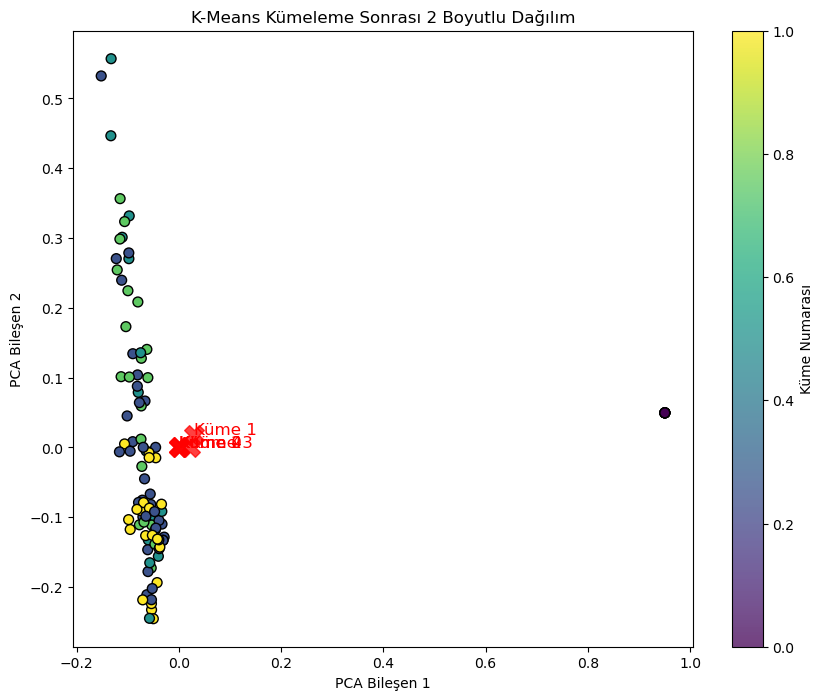

In [25]:
# Küme merkezlerini hesapla
centroids = kmeans.cluster_centers_

# Görselleştir
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Küme merkezleri
for i, centroid in enumerate(centroids):
    plt.annotate(f'Küme {i}', xy=(centroid[0], centroid[1]), fontsize=12, color='red')
plt.xlabel("PCA Bileşen 1")
plt.ylabel("PCA Bileşen 2")
plt.title("K-Means Kümeleme Sonrası 2 Boyutlu Dağılım")
plt.colorbar(label='Küme Numarası')
plt.show()


Küme Merkezlerinin Alınması:


     centroids = kmeans.cluster_centers_
kmeans.cluster_centers_: K-Means algoritması tarafından bulunan her bir kümenin merkez koordinatlarını içeren bir matris oluşturur.
Görselleştirme için Figür Oluşturma:

     plt.figure(figsize=(10, 8))
Görselin boyutunu ayarlamak için yeni bir figür oluşturur.
Veri Noktalarının Dağılımı:


     plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o',           edgecolor='k', s=50)
X_reduced: Boyut indirgeme işlemiyle elde edilen 2 boyutlu verileri temsil eder.
c=clusters: Her bir veri noktasının hangi kümeye ait olduğunu belirtir.
cmap='viridis': Renk haritasını ayarlayarak her kümenin farklı bir renkte görünmesini sağlar.
marker='o': Veri noktalarının biçimini belirler (daire).
edgecolor='k': Noktaların kenar rengini siyah yapar.
s=50: Noktaların boyutunu ayarlar.
Küme Merkezlerinin Görselleştirilmesi:

     plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
centroids: Küme merkezlerini görselleştirir.
c='red': Küme merkezlerinin rengini kırmızı yapar.
s=200: Küme merkezlerinin boyutunu ayarlar (daha büyük).
alpha=0.75: Opaklık değerini ayarlar (daha şeffaf).
marker='X': Küme merkezinin biçimini belirler (çarpı).
Küme Merkezlerini Etiketleme:

     for i, centroid in enumerate(centroids):
       plt.annotate(f'Küme {i}', xy=(centroid[0], centroid[1]), fontsize=12, color='red')
Bu döngü, her bir küme merkezinin üzerine, küme numarasını yazmak için kullanılır.
plt.annotate: Belirli bir noktaya (centroid) metin ekler.
Ekseni Etiketleme ve Başlık Eklemek:

plt.xlabel("PCA Bileşen 1")
plt.ylabel("PCA Bileşen 2")
plt.title("K-Means Kümeleme Sonrası 2 Boyutlu Dağılım")
xlabel ve ylabel: X ve Y eksenlerini etiketler.
title: Grafiğin başlığını ayarlar.
Renk Çubuğu Eklemek:

plt.colorbar(label='Küme Numarası')
Küme numaralarının hangi renkle temsil edildiğini gösteren bir renk çubuğu ekler.
Grafiği Gösterme:

plt.show()
Grafiği görüntüler.
Analiz
Bu görselleştirme, K-Means kümeleme sonuçlarını anlamanı kolaylaştırır. Veri noktalarının küme merkezlerine olan uzaklıklarını ve dağılımlarını görerek, hangi verilerin hangi kümeye ait olduğunu ve kümeler arasındaki farklılıkları daha iyi değerlendirebilirsin.

Küme Merkezleri: Kümelerin özelliklerini anlamak için önemlidir. Merkezler, o kümedeki ortalama özellikleri temsil eder.
Renkler ve Dağılımlar: Her küme farklı bir renkle temsil edildiğinden, veri noktalarının kümeler arasındaki dağılımını hızlıca görebilirsin.
Etiketler: Küme merkezlerinin etiketlenmesi, hangi kümenin neyi temsil ettiğini daha net gösterir.

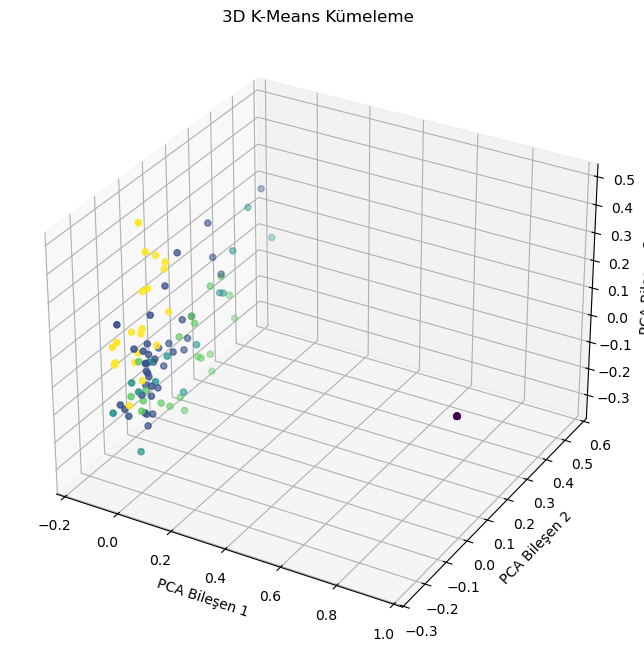

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# 3D PCA
pca_3d = PCA(n_components=3)
X_reduced_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel('PCA Bileşen 1')
ax.set_ylabel('PCA Bileşen 2')
ax.set_zlabel('PCA Bileşen 3')
plt.title("3D K-Means Kümeleme")
plt.show()



Gerekli Kütüphanelerin İçe Aktarılması:

     from mpl_toolkits.mplot3d import Axes3D
3D grafikleri çizmek için gerekli olan mpl_toolkits.mplot3d kütüphanesi içe aktarılır.
3D Boyut İndirgeme:

        pca_3d = PCA(n_components=3)
        X_reduced_3d = pca_3d.fit_transform(X)
PCA(n_components=3): PCA yöntemini kullanarak veriyi 3 boyutlu hale getirir.
fit_transform(X): Orijinal veriyi 3 boyutlu bir temsil haline getirir.
Grafik için Figür Oluşturma:

        fig = plt.figure(figsize=(10, 8))
Görselin boyutunu ayarlamak için yeni bir figür oluşturur.
3D Alt Grafik Oluşturma:

        ax = fig.add_subplot(111, projection='3d')
3 boyutlu bir alt grafik (subplot) oluşturur.
3D Veri Dağılımını Çizme:

        ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], c=clusters, cmap='viridis')
X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2]: 3 boyutlu PCA bileşenlerini temsil eder.
c=clusters: Her bir veri noktasının hangi kümeye ait olduğunu belirtir.
cmap='viridis': Renk haritasını ayarlayarak her kümenin farklı bir renkte görünmesini sağlar.
Ekseni Etiketleme:

        ax.set_xlabel('PCA Bileşen 1')
        ax.set_ylabel('PCA Bileşen 2')
        ax.set_zlabel('PCA Bileşen 3')
set_xlabel, set_ylabel, set_zlabel: X, Y ve Z eksenlerini etiketler.
Başlık Ekleme:

    plt.title("3D K-Means Kümeleme")
Grafiğin başlığını ayarlar.
Grafiği Gösterme:

    plt.show()
Grafiği görüntüler.
Analiz
Bu 3D görselleştirme, verilerin üç boyutlu alan içinde nasıl dağıldığını anlamanı sağlar. Aşağıda, bu tür bir 3D grafiğin sağladığı avantajlar ve analiz yöntemleri belirtilmiştir:

Kümelerin Dağılımı: 3D alan içinde kümelerin konumunu ve dağılımını görebilirsin. Bu, kümelerin birbirine olan uzaklıklarını ve benzerliklerini analiz etmene yardımcı olur.
Derinlik Algısı: 3D görselleştirme, veri noktalarının birbirine göre konumlarını daha iyi anlamanı sağlar. Özellikle daha fazla bileşene sahip verilerde, boyutları görsel olarak incelemek yararlı olabilir.
Küme Ayrımı: Kümeler arasındaki boşlukları ve örtüşmeleri görmek, modelin başarısını değerlendirirken önemlidir. Küme merkezlerinin uzaklıkları, kümeler arasındaki ayrımın ne kadar net olduğunu gösterir.

In [29]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Skoru:", silhouette_avg)


Silhouette Skoru: 0.07523034880507293


Silhouette skoru, bir kümeleme algoritmasının (örneğin, K-Means) performansını değerlendirmek için kullanılan bir metriktir. Bu metrik, her bir veri noktasının kendi kümesine olan benzerliğini, diğer kümedeki noktalarla olan benzerliğiyle karşılaştırarak hesaplar. Silhouette skoru, -1 ile 1 arasında bir değer alır:

1'e yakın değerler: Veri noktaları, kendi kümelerine çok yakın ve diğer kümelerden oldukça uzak demektir. Bu, iyi bir kümeleme gösterir.
0 değeri: Veri noktaları, iki kümeye eşit uzaklıkta ve net bir kümeye ait değilse bu durumu ifade eder.
Negatif değerler: Veri noktaları, kendi kümesine göre diğer kümelere daha yakınsa, bu durum kümeleme kalitesinin kötü olduğunu gösterir.
Analiz
Verdiğin Silhouette skoru: 0.075:

Bu değer, 0 ile 1 arasında bir değer olup, 0.075 değeri oldukça düşük bir skordur.
Düşük bir Silhouette skoru (0.075), verilerin daha belirgin bir şekilde gruplandırılmadığını, yani noktaların kendi kümeleri ile diğer kümeler arasında net bir ayrım yapmadığını gösterir.
Bu durum, kümelerin birbirine yakın olduğunu veya veri kümesinin karmaşık bir yapıya sahip olduğunu gösterebilir. Dolayısıyla, bazı veri noktaları, kendi kümelerinin dışında görünmekte ve bu da anlamlı bir kümeleme yapmanın zor olduğunu işaret eder.
############İyileştirme Önerileri#############

Küme Sayısını Gözden Geçir: K-Means algoritmasında kullanılan küme sayısını değiştirmek (örneğin, daha fazla veya daha az küme deneyerek) farklı sonuçlar elde etmeni sağlayabilir.

Farklı Kümeleme Algoritmaları: K-Means dışında DBSCAN veya Hiyerarşik Kümeleme gibi alternatif algoritmaları deneyerek farklı sonuçlar alabilirsin.

Veri Ön İşleme: Verilerinizi normalize etmek, boyut indirgeme teknikleri uygulamak veya gürültüyü azaltmak, daha iyi sonuçlar elde etmeni sağlayabilir.

Özellik Seçimi: Kümeler arası benzerliği artırmak için daha iyi özellikler seçebilir veya farklı özellik mühendislik yöntemleri deneyebilirsin.

In [31]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X, clusters)
print("Davies-Bouldin İndeksi:", db_index)


Davies-Bouldin İndeksi: 4.608785644380445



Davies-Bouldin İndeksi, bir kümeleme algoritmasının kalitesini değerlendirmek için kullanılan bir başka metriktir. Bu indeks, kümelerin içindeki benzerlik ile farklı kümeler arasındaki ayrımı ölçer. Temel olarak, bir kümenin içindeki verilerin homojenliğini ve farklı kümeler arasındaki ayrılığı değerlendirir.

Davies-Bouldin İndeksi Değerlendirmesi
Davies-Bouldin İndeksi, daha düşük değerler daha iyi kümeleme kalitesini gösterir.
İndeksin değeri: 0 ile ∞ arasında değişir. Düşük değerler, daha iyi kümelerin tanımlandığını gösterirken, yüksek değerler kötü bir kümeleme performansını ifade eder.
Hedef: 0’a yakın bir değer elde etmek ideal iken, 4.61 gibi bir değer, kümeleme kalitesinin düşük olduğunu gösterir.
Analiz
Verdiğin Davies-Bouldin İndeksi: 4.608:

Bu değer, kötü bir kümeleme performansı olduğunu gösteriyor.
Daha yüksek bir indeks değeri, kümeler arasındaki ayrılığın zayıf olduğunu veya içindeki noktaların birbiriyle olan benzerliğinin yüksek olduğunu gösterir.
Bu, verilerin kümeler arasında net bir ayrım yapmadığını ve dolayısıyla kümeleme algoritmasının iyi bir sonuç vermediğini işaret eder.
###############İyileştirme Önerileri#################
Küme Sayısını Gözden Geçir: Davies-Bouldin İndeksi, belirli bir küme sayısıyla hesaplandığı için farklı sayıda küme deneyerek farklı sonuçlar alabilirsin.

Farklı Kümeleme Yöntemleri: K-Means dışında farklı algoritmalar (DBSCAN, Hiyerarşik Kümeleme vb.) deneyebilirsin. Farklı algoritmalar, verinin yapısına göre daha iyi sonuçlar verebilir.

Veri Ön İşleme: Verilerin daha iyi özelliklerle temsil edilmesi için normalize etme veya standartlaştırma uygulamak, farklı sonuçlar elde etmene yardımcı olabilir.

Özellik Mühendisliği: Kullanılan özelliklerin niteliğini artırmak ve gereksiz olanları çıkarmak, daha anlamlı kümeler oluşturmanı sağlayabilir.

In [59]:
# Küme isimleri
cluster_names = {
    0: "Genel Konular",
    1: "Finans ve Ekonomi",
    2: "Teknoloji ve Yapay Zeka",
    3: "Sağlık ve Yaşam",
    4: "Uzay ve Bilim"
}

# Her bir kümenin anahtar kelimelerini analiz etme ve sonuçları isimlerle eşleştirme
def analyze_clusters_with_names(texts, clusters, n_clusters, cluster_names):
    from collections import Counter
    cluster_keywords = {}
    for cluster in range(n_clusters):
        cluster_texts = [texts[i] for i in range(len(texts)) if clusters[i] == cluster]
        words = ' '.join(cluster_texts).split()
        most_common = Counter(words).most_common(10)  # En sık 10 kelime
        cluster_keywords[cluster_names[cluster]] = most_common  # Küme isimleriyle eşleştir
    return cluster_keywords

# Anahtar kelimeleri ve küme isimlerini analiz etme
cluster_keyword_analysis = analyze_clusters_with_names(texts, clusters, 5, cluster_names)

# Sonuçları yazdırma
for cluster_name, keywords in cluster_keyword_analysis.items():
    print(f"Küme: {cluster_name}")
    print("Anahtar Kelimeler:", keywords)
    


Küme: Genel Konular
Anahtar Kelimeler: [('remov', 7)]
Küme: Finans ve Ekonomi
Anahtar Kelimeler: [('year', 6), ('news', 6), ('new', 5), ('yahoo', 5), ('stock', 4), ('black', 3), ('one', 3), ('report', 3), ('may', 3), ('financ', 3)]
Küme: Teknoloji ve Yapay Zeka
Anahtar Kelimeler: [('verg', 3), ('appl', 3), ('intellig', 3), ('cnn', 3), ('smartphon', 2), ('like', 2), ('cnet', 2), ('big', 2), ('bitdo', 1), ('first', 1)]
Küme: Sağlık ve Yaşam
Anahtar Kelimeler: [('cnn', 4), ('health', 3), ('time', 3), ('gizmodo', 2), ('poison', 2), ('first', 2), ('look', 2), ('daili', 2), ('say', 2), ('game', 2)]
Küme: Uzay ve Bilim
Anahtar Kelimeler: [('new', 7), ('nasa', 3), ('york', 3), ('game', 2), ('messag', 2), ('techcrunch', 2), ('extend', 2), ('space', 2), ('earth', 2), ('discov', 2)]


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


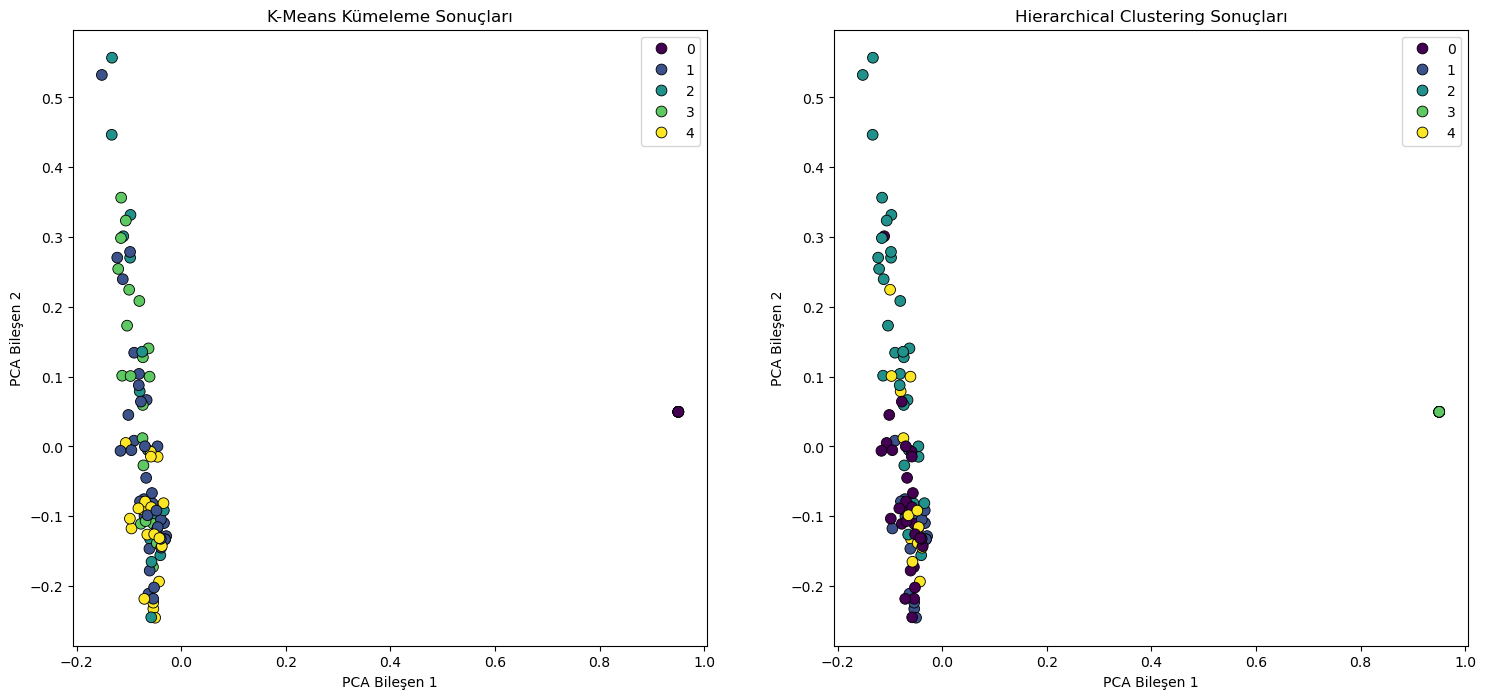

In [63]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Veriyi 2D'ye indirgemek için PCA kullanarak boyut indirgeme
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# K-Means kümeleme
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

# Hierarchical Clustering (Agglomerative Clustering) kümeleme
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(X)

# Görselleştirme: K-Means ve Hierarchical Clustering karşılaştırması
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# K-Means görselleştirme
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=kmeans_clusters, palette='viridis', ax=ax1, marker='o', edgecolor='k', s=60)
ax1.set_title("K-Means Kümeleme Sonuçları")
ax1.set_xlabel("PCA Bileşen 1")
ax1.set_ylabel("PCA Bileşen 2")

# Hierarchical Clustering görselleştirme
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=hierarchical_clusters, palette='viridis', ax=ax2, marker='o', edgecolor='k', s=60)
ax2.set_title("Hierarchical Clustering Sonuçları")
ax2.set_xlabel("PCA Bileşen 1")
ax2.set_ylabel("PCA Bileşen 2")

plt.show()


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Uç Değer İndeksleri: [31 73 46 40 69 80  5 50 60 24]


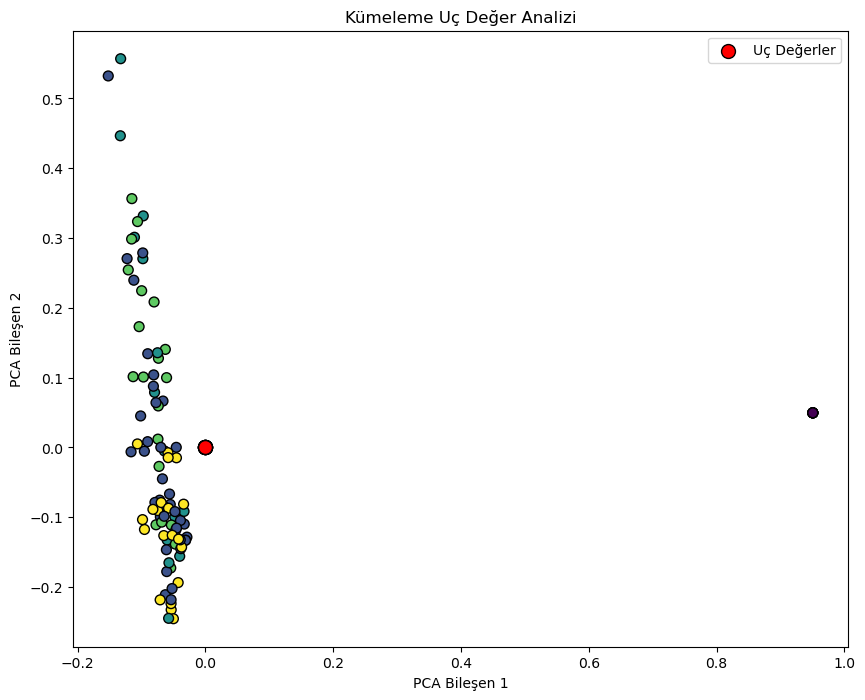

In [67]:
import numpy as np
from sklearn.cluster import KMeans

# K-Means ile küme merkezlerini belirle
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Her noktanın kendi küme merkezine olan uzaklığını hesapla
distances = np.linalg.norm(X - centroids[clusters], axis=1)

# En uzak 10 veri noktasını uç değer olarak belirle
outlier_indices = distances.argsort()[-10:]  # En uzak 10 nokta
outliers = X[outlier_indices]

print("Uç Değer İndeksleri:", outlier_indices)

# Uç değerlerin görselleştirilmesi (2D için)
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=100, edgecolor='k', label='Uç Değerler')
plt.xlabel("PCA Bileşen 1")
plt.ylabel("PCA Bileşen 2")
plt.legend()
plt.title("Kümeleme Uç Değer Analizi")
plt.show()


In [73]:
from sklearn.metrics import silhouette_samples
import numpy as np

silhouette_vals = silhouette_samples(X, clusters)
for i in range(kmeans.n_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    print(f"Küme {i} Silhouette Ortalaması: {np.mean(cluster_silhouette_vals)}")


Küme 0 Silhouette Ortalaması: 1.0
Küme 1 Silhouette Ortalaması: -0.003956039122486054
Küme 2 Silhouette Ortalaması: 0.013991694379921317
Küme 3 Silhouette Ortalaması: 0.012746863335002603
Küme 4 Silhouette Ortalaması: 0.01132497091326498


Analiz edilen çıktıya göre:

Küme 0: Silhouette ortalaması 1.0. Bu, bu kümedeki örneklerin birbirine çok yakın olduğunu ve diğer kümelerden belirgin şekilde ayrıldığını gösteriyor. Yani, Küme 0 çok iyi bir kümeleme sonucu elde etmiş.

Küme 1: Silhouette ortalaması -0.0039. Bu, bu kümedeki örneklerin, diğer kümelere oldukça yakın olduğunu ve dolayısıyla bu kümede bir belirsizlik olduğunu gösterir. Bu kümedeki bazı noktalar, başka bir kümede daha uygun olabilirdi.

Küme 2, Küme 3 ve Küme 4: Silhouette ortalamaları sırasıyla 0.014, 0.0127 ve 0.0113. Bu değerler de pozitif ama oldukça düşük. Bu da, bu kümelerin çok belirgin olmadığını ve örneklerin birbirine yakın olduğunu gösteriyor. Bu durumda, bu kümeler üzerinde daha fazla çalışma yapmak veya başka algoritmalar denemek gerekebilir.

Genel olarak, sonuçlar, Küme 0'ın yüksek bir ayrışma sağladığını, diğer kümelerin ise yeterince iyi bir ayrışma sağlamadığını ve bazı noktaların yanlış bir kümede yer alıyor olabileceğini gösteriyor. Eğer bu projeyi geliştirmeyi düşünüyorsanız, belki bu kümeleri yeniden gözden geçirmek veya farklı kümeleme tekniklerini denemek faydalı olabilir.